In [11]:
# Import required libraries

from dataclasses import dataclass

import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from scipy.io import loadmat
from torchvision.utils import make_grid
from tqdm import tqdm

In [3]:
# Create data types
@dataclass
class Dataset_SVHN:
    """
    X: np.ndarray of shape (26032, 32, 32, 3) => (image_number, Y=row, X=column, RGB)
        containing the 32x32 pixel3 color number images
        
    y: np.array of shape (26032, 1) => (image_number, int_label==>[0..9])
        containing the labels (actual numbers) of the images
    
    
    # The Street View House Numbers (SVHN) Dataset
    
    SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with minimal
    requirement on data preprocessing and formatting.
    It can be seen as similar in flavor to MNIST (e.g., the images are of small cropped digits), but incorporates an
    order of magnitude more labeled data (over 600,000 digit images) and comes from a significantly harder, unsolved,
    real world problem (recognizing digits and numbers in natural scene images).
    SVHN is obtained from house numbers in Google Street View images.
    """

    # def __init__(self, X: np.ndarray, y: np.array):
    #     self.X = X
    #     self.y = y
    
    def __init__(self, X: np.ndarray, y: np.array):
        self.X = X
        self.y = y

In [4]:

def load_data():
    data_train = loadmat('train_32x32.mat')
    data_test = loadmat('test_32x32.mat')

    return (data_train, data_test)


def shapeshift_input_data(X: np.ndarray):
    # convert shape: (32, 32, 3, 26032) to: (26032, 32, 32, 3) => (image_number, Y=row, X=column, RGB)
    return np.moveaxis(X, -1, 0)


def prepare_data():
    (train, test) = load_data()

    shifted_train_X = shapeshift_input_data(train['X'])
    shifted_test_X = shapeshift_input_data(test['X'])

    train = Dataset_SVHN(shifted_train_X, train['y'])
    test = Dataset_SVHN(shifted_test_X, test['y'])

    return (train, test)


(train, test) = prepare_data()

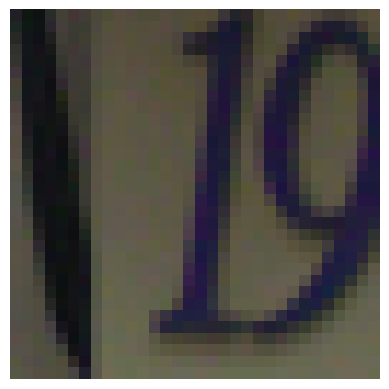

In [5]:
def plot_example_number():
    plt.axis('off')
    plt.imshow(train.X[0])
    

plot_example_number()


In [7]:
def set_compute_device():
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(device)

set_compute_device()

cuda


In [10]:
def configure_run():
    return {
        "epoch_count": 10,
        # since there are classifications of 10 a multiple of that should hopefully always have roughly equal amounts of
        # each classification in a batch size
        "batch_size": 100
    }

config = configure_run()
#config["batch_size"]

32

In [ ]:
print(train.X[0])

def transformer():
    # alias for readability
    tf = torchvision.transforms
    
    transform = tf.Compose([
        tf.ToTensor()
    ])    
    return transform

transform = transformer()

transformed_train_X = [transform(sample) for sample in train.X]
transformed_test_X = [transform(sample) for sample in test.X]


In [ ]:
# Use the `pin_memory` argument for better GPU performance
loader_train = torch.utils.data.DataLoader(
    transformed_train_X,
    batch_size=config["batch_size"],
    shuffle=True,
    num_workers=0,
    pin_memory=True)

loader_test = torch.utils.data.DataLoader(
    transformed_test_X,
    batch_size=config["batch_size"],
    shuffle=True,
    num_workers=0,
    pin_memory=True)

In [ ]:
def show_batch():
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 12))
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(make_grid(images[:64], nrow=8).permute(1, 2, 0))
        break


show_batch(trainloader)